# Fig3: Dissecting the structural basis of burst and sustained dynamics through domain swapping

In [1]:
# Fig3: Dissecting the structural basis of burst and sustained dynamics through domain swapping

import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
import arviz as az


In [2]:

df_A = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/output_data/merged_expression_PIV.csv")
df_C_E_G = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/111624-C-E-G-RT/2p5ulTMB-0p5MT-1ulDNA_/output_data/merged_expression_PIV.csv")
df_H = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/output_data/merged_expression_PIV.csv")
df_H = df_H[df_H['condition'].str.contains('Kif3_') & df_H['condition'].str.contains('_1-RT')]

df_D = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/110324-D_titration-RT/2p5TMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_B_F = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/111024-B-F-titrations-RT/2p5TMB-1ulDNA_/output_data/combined_expression.csv")

# Change the column names in df_B_F to be lowercase for 'Condition' and 'Subcondition'
df_B_F.rename(columns={'Condition': 'condition', 'Subcondition': 'subcondition'}, inplace=True)

df_ThTr = pd.read_csv("../../../Thomson Lab Dropbox/David Larios/activedrops/main/020124-ThTr-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv")

df_AcSu2 = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021025-BleSto-AcSu2-titrations/2p5ulTMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_DiPu = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021025-DiPu-titrations/2p5ulTMB-1ulDNA_1/output_data/merged_expression_PIV.csv")

df_HeAl = pd.read_csv("~/Thomson Lab Dropbox/David Larios/activedrops/main/021625-HeAl-titrations-RT/2p5ulTMB-1ulDNA_/output_data/merged_expression_PIV.csv")


# Merge the two DataFrames into one
df = pd.concat([df_A, df_H, df_C_E_G, df_D, df_B_F, df_ThTr, df_AcSu2, df_DiPu, df_HeAl], ignore_index=True, join='outer')
df


,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,dcev [1]_mean,shear [1/s]_mean,strain [1/s]_mean,vector direction [degrees]_mean,correlation length [m]_mean,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h)
0,K401_1p25nM-RT,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K401_1p25nM-RT,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,K401_1p25nM-RT,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,K401_1p25nM-RT,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K401_1p25nM-RT,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,20.590965,-1.047945e-07,0.000004,113.293994,0.000349,0.000722,4.155914e-20,3.441722e-15,399.8,6.663333
150640,HeAl_1p25nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,14.378549,-7.229753e-07,0.000002,34.239807,0.000109,0.005181,1.704041e-22,2.569826e-14,399.8,6.663333
150641,HeAl_2p5nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,11.316001,-4.709862e-06,-0.000001,-29.315209,0.000084,0.004440,8.287080e-20,2.810620e-14,399.8,6.663333
150642,HeAl_5nM-RT,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,14.091033,-3.758733e-06,-0.000003,105.622537,0.000308,0.001562,4.510662e-21,1.451744e-14,399.8,6.663333


In [3]:
# Split condition column and extract components
df['protein'] = df['condition'].str.split('_').str[0]

# Replace protein names
df['protein'] = df['protein'].replace({'K401': 'A', 'Kif3': 'H'})

# Extract DNA concentration, removing -RT and handling different formats
df['DNA nM'] = df['condition'].str.split('_').str[1].str.replace('-RT', '').str.replace('p', '.').str.replace('nM', '')

df['kDa'] = df['protein'].apply(lambda x: 78 if x in ['A', 'B', 'C', 'D'] else 93 if x in ['E', 'F', 'G', 'H'] else None)


# Remove -RT from condition column
df['condition'] = df['condition'].str.replace('-RT', '')

# multiply all the values of divergence and vorticity by 1000
df['divergence [1/s]_mean'] = df['divergence [1/s]_mean'] * 1000
df['vorticity [1/s]_mean'] = df['vorticity [1/s]_mean'] * 1000

# let's create another column called "protein number". nM to M. Divide by 2µl. Avogadro's number.
df['protein number'] = df['Protein Concentration_nM'] * 1E-9 * 2E-6 * 6.022E23 

# Now let's create a column called "energy per protein" dividing power by protein number
df['energy per protein'] = df['power [W]_mean'] / df['protein number']


# save the dataframe
df.to_csv('~/Thomson Lab Dropbox/David Larios/activedrops/main/all/chimeras_titrations.csv', index=True)
df


,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h),protein,DNA nM,kDa,protein number,energy per protein
0,K401_1p25nM,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,0.000000e+00,NaN
1,K401_1p25nM,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,2.300179e+09,NaN
2,K401_1p25nM,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,3.704045e+09,NaN
3,K401_1p25nM,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,5.720130e+09,NaN
4,K401_1p25nM,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,7.862544e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,0.000722,4.155914e-20,3.441722e-15,399.8,6.663333,HeAl,160,NaN,NaN,NaN
150640,HeAl_1p25nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,0.005181,1.704041e-22,2.569826e-14,399.8,6.663333,HeAl,1.25,NaN,NaN,NaN
150641,HeAl_2p5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,0.004440,8.287080e-20,2.810620e-14,399.8,6.663333,HeAl,2.5,NaN,NaN,NaN
150642,HeAl_5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,0.001562,4.510662e-21,1.451744e-14,399.8,6.663333,HeAl,5,NaN,NaN,NaN


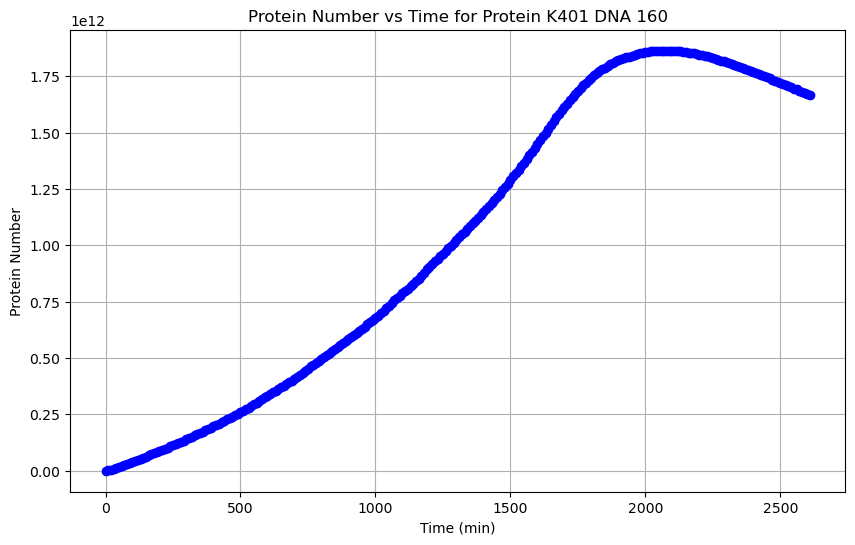

In [4]:
# Filter the dataframe for protein 'K401' and DNA concentration '160'
filtered_df = df[(df['protein'] == 'A') & (df['DNA nM'] == '160')]

# Plot protein number vs time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['time (min)'], filtered_df['protein number'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (min)')
plt.ylabel('Protein Number')
plt.title('Protein Number vs Time for Protein K401 DNA 160')
plt.grid(True)
plt.show()


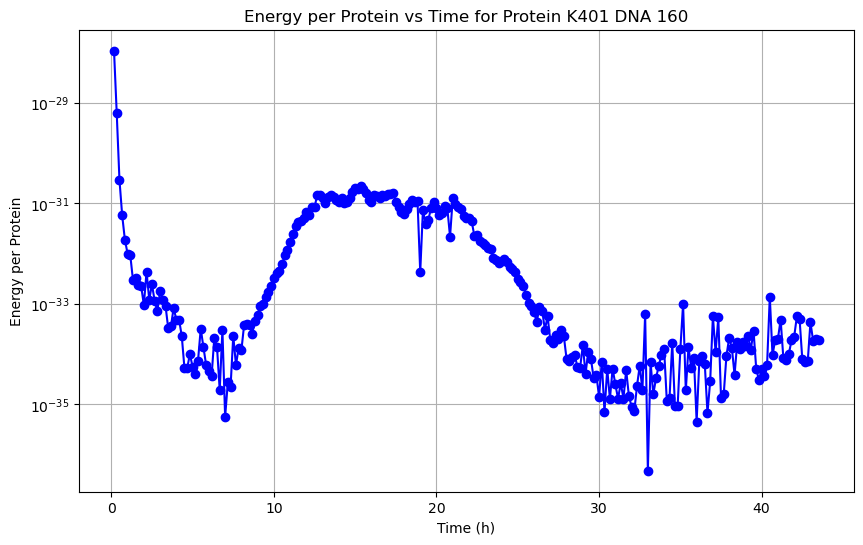

In [5]:
# Filter the dataframe for protein 'K401' and DNA concentration '160'
filtered_df = df[(df['protein'] == 'A') & (df['DNA nM'] == '160')]

# Plot energy per protein vs time in hours with y axis log scale
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['time (h)'], filtered_df['energy per protein'], marker='o', linestyle='-', color='b')
plt.xlabel('Time (h)')
plt.ylabel('Energy per Protein')
plt.yscale('log')
plt.title('Energy per Protein vs Time for Protein K401 DNA 160')
plt.grid(True)
plt.show()


In [6]:
df['condition'].unique()

array(['K401_1p25nM', 'K401_2p5nM', 'K401_5nM', 'K401_10nM', 'K401_20nM',
       'K401_40nM', 'K401_80nM', 'K401_160nM', 'Kif3_1p25nM_1',
       'Kif3_2p5nM_1', 'Kif3_5nM_1', 'Kif3_10nM_1', 'Kif3_20nM_1',
       'Kif3_40nM_1', 'Kif3_80nM_1', 'Kif3_160nM_1', 'C_1p25nM',
       'C_2p5nM', 'C_5nM', 'C_10nM', 'C_20nM', 'C_40nM', 'C_80nM',
       'C_160nM', 'E_1p25nM', 'E_2p5nM', 'E_5nM', 'E_10nM', 'E_20nM',
       'E_40nM', 'E_80nM', 'E_160nM', 'G_1p25nM', 'G_2p5nM', 'G_5nM',
       'G_10nM', 'G_20nM', 'G_40nM', 'G_80nM', 'G_160nM', 'D_1p25nM',
       'D_2p5nM', 'D_5nM', 'D_10nM', 'D_20nM', 'D_40nM', 'D_80nM',
       'D_160nM', 'B_1p25nM', 'B_2p5nM', 'B_5nM', 'B_10nM', 'B_20nM',
       'B_40nM', 'B_80nM', 'B_160nM', 'F_1p25nM', 'F_2p5nM', 'F_5nM',
       'F_10nM', 'F_20nM', 'F_40nM', 'F_80nM', 'F_160nM', 'ThTr_1p25nM',
       'ThTr_2p5nM', 'ThTr_5nM', 'ThTr_10nM', 'ThTr_20nM', 'ThTr_40nM',
       'ThTr_80nM', 'ThTr_160nM', 'AcSu2_1p25nM', 'AcSu2_2p5nM',
       'AcSu2_5nM', 'AcSu2_10nM', 'A

In [7]:
import matplotlib.pyplot as plt

# Get the default color cycle from the current style
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Create a dictionary mapping proteins to default colors
protein_color_map = {protein: color for protein, color in zip('ABCDEFGH', default_colors)}

print(protein_color_map)

{'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c', 'D': '#d62728', 'E': '#9467bd', 'F': '#8c564b', 'G': '#e377c2', 'H': '#7f7f7f'}


In [8]:
def filter_and_replace_values(df, filters_list):
    """
    Filters dataframe for multiple protein/DNA concentration combinations,
    then replaces velocity values with NaN where time is outside the specified interval.
    
    Parameters:
    - df: DataFrame containing the data
    - filters_list: List of tuples, each containing (protein_name, dna_concentration, min_time_minutes, max_time_minutes)
    
    Returns:
    - Modified copy of the dataframe
    """
    # Create a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()
    
    # Get velocity columns
    velocity_columns = list(df.columns[10:-5])
    
    # Apply each filter in the list
    for protein_name, dna_concentration, min_time_minutes, max_time_minutes in filters_list:
        # Create mask for the specified protein and DNA concentration
        mask = (df_copy['protein'] == protein_name) & (df_copy['DNA nM'] == dna_concentration)
        
        # Convert time thresholds to seconds
        min_time_seconds = min_time_minutes * 60
        max_time_seconds = max_time_minutes * 60
        
        # Replace velocity values with NaN where time is outside the interval
        for col in velocity_columns:
            if col in df_copy.columns:
                df_copy.loc[(mask) & ((df_copy['time (s)'] < min_time_seconds) | 
                                      (df_copy['time (s)'] > max_time_seconds)), col] = np.nan
    
    return df_copy

filters = [
    ('A', '160', 300, 52*60),
    ('A', '80', 300, 52*60),
    ('A', '40', 340, 52*60),
    ('A', '20', 300, 52*60),

    ('C', '160', 80, 32*60),
    ('C', '80', 80, 32*60),
    ('C', '40', 80, 32*60),
    ('C', '20', 80, 32*60),
    ('C', '10', 80, 32*60),
    ('C', '5', 80, 32*60),
    ('C', '2.5', 500, 20*60),
    ('C', '1.25', 14*60, 22*60),

    ('D', '160', 1, 60),
    ('D', '80', 1, 60),
    ('D', '40', 1, 60),
    ('D', '20', 1, 60),
    ('D', '10', 3, 80),
    ('D', '5', 5, 120),
    ('D', '2.5', 10, 150),
    ('D', '1.25', 15, 150),

    ('H', '160', 8, 60),
    ('H', '80', 2, 60),
    ('H', '40', 7, 60),
    ('H', '20', 2, 60),
    ('H', '10', 8, 100),
    ('H', '5', 10, 100),
    ('H', '2.5', 10, 100),
    ('H', '1.25', 30, 100),

    ('ThTr', '160', 30, 18*60),
    ('ThTr', '80', 30, 16*60),
    ('ThTr', '40', 30, 42*60),
    ('ThTr', '20', 30, 6000),
    ('ThTr', '10', 30, 6000),
    ('ThTr', '5', 30, 6000),
    ('ThTr', '2.5', 30, 6000),
    ('ThTr', '1.25', 30, 6000),

    ('HeAl', '160', 5, 36),
    ('HeAl', '80', 5, 36),
    ('HeAl', '40', 4, 36),
    ('HeAl', '20', 4, 36),
    ('HeAl', '10', 3, 50),
    ('HeAl', '5', 3, 120),
    ('HeAl', '2.5', 3, 210),
    ('HeAl', '1.25', 3, 210*60),

    ('AcSu2', '160', 0, 32*60),
    ('AcSu2', '80', 0, 32*60),
    ('AcSu2', '40', 0, 32*60),
    ('AcSu2', '20', 0, 32*60),
    ('AcSu2', '10', 0, 32*60),
    ('AcSu2', '5', 1, 32*60),
    ('AcSu2', '2.5', 60, 32*60),
    ('AcSu2', '1.25', 60, 32*60),

    ('DiPu', '160', 0, 10*60),
    ('DiPu', '80', 0, 10*60),
    ('DiPu', '40', 0, 10*60),
    ('DiPu', '20', 0, 10*60),
    ('DiPu', '10', 0, 10*60),
    ('DiPu', '5', 40, 32*60),
    ('DiPu', '2.5', 2*60, 32*60),
    ('DiPu', '1.25', 2*60, 32*60),
]


# Assume filter_and_replace_values is defined elsewhere.
df_copy = filter_and_replace_values(df, filters)


# Display the modified dataframe
df_copy

,condition,subcondition,time (s),Time_min,Time_h,Mean Intensity,Protein Concentration_ng_ul,Protein Concentration_nM,Unnamed: 0,frame,...,distance [m]_mean,power [W]_mean,work [J]_mean,time (min),time (h),protein,DNA nM,kDa,protein number,energy per protein
0,K401_1p25nM,Rep1,0.0,0.0,0.000000,179.914233,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,0.000000e+00,NaN
1,K401_1p25nM,Rep1,600.0,10.0,0.166667,181.127909,0.051565,1.909813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,2.300179e+09,NaN
2,K401_1p25nM,Rep1,1200.0,20.0,0.333333,181.868650,0.083037,3.075428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,3.704045e+09,NaN
3,K401_1p25nM,Rep1,1800.0,30.0,0.500000,182.932426,0.128233,4.749361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,5.720130e+09,NaN
4,K401_1p25nM,Rep1,2400.0,40.0,0.666667,184.062858,0.176261,6.528183,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A,1.25,78.0,7.862544e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150639,HeAl_160nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,HeAl,160,NaN,NaN,NaN
150640,HeAl_1p25nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,0.005181,1.704041e-22,2.569826e-14,399.8,6.663333,HeAl,1.25,NaN,NaN,NaN
150641,HeAl_2p5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,HeAl,2.5,NaN,NaN,NaN
150642,HeAl_5nM,Rep1,23988.0,NaN,NaN,NaN,NaN,NaN,3998.0,3998.0,...,NaN,NaN,NaN,NaN,NaN,HeAl,5,NaN,NaN,NaN


In [9]:
# # Specify which plots to include. For instance, include all:
# plots_to_include = [
#     'Protein_Concentration_vs_Time',
#     'Mean_Velocity_vs_Protein_Concentration',
#     'Mean_Power_vs_Time',
#     # 'Total_Work_vs_DNA_Concentration',
#     'Mean_Velocity_vs_Time',
#     'Correlation_Length_vs_Time',
#     # 'Activation_Onset_vs_Protein_Concentration',
#     # 'Protein_Concentration_vs_Max_Velocity',
#     'Protein_Concentration_Rate_of_Change',
#     # 'Motion_Duration_vs_DNA_Concentration',
#     # 'Total_Work_vs_Activation_Onset',
#     # 'Correlation_Length_vs_Velocity',
#     'Vorticity_vs_Time',
#     'Divergence_vs_Time',
#     'Vector_Direction_vs_Time'
# ]
# # To generate combined plots (grid) set combined_plots=True and set grid_size as desired.
# generate_plots_master(df_copy, proteins, dna_concentrations=titrations[:],
#                         output_dir='../../../Downloads/Selected_Proteins_Plots',
#                         velocity_threshold=0.2, time_unit='h', colored_DNAnM=False,
#                         combined_plots=True, display_dna_text=True,
#                         plots_to_include=plots_to_include, grid_size=(3,3), fig_size=(6,6))


In [10]:
df.columns

Index(['condition', 'subcondition', 'time (s)', 'Time_min', 'Time_h',
       'Mean Intensity', 'Protein Concentration_ng_ul',
       'Protein Concentration_nM', 'Unnamed: 0', 'frame', 'x [m]_mean',
       'y [m]_mean', 'u [m/s]_mean', 'v [m/s]_mean', 'data type [-]_mean',
       'vorticity [1/s]_mean', 'velocity magnitude [m/s]_mean',
       'divergence [1/s]_mean', 'dcev [1]_mean', 'shear [1/s]_mean',
       'strain [1/s]_mean', 'vector direction [degrees]_mean',
       'correlation length [m]_mean', 'distance [m]_mean', 'power [W]_mean',
       'work [J]_mean', 'time (min)', 'time (h)', 'protein', 'DNA nM', 'kDa',
       'protein number', 'energy per protein'],
      dtype='object')

Titrations: [160, 80, 40, 20, 10, 5, 2.5, 1.25]


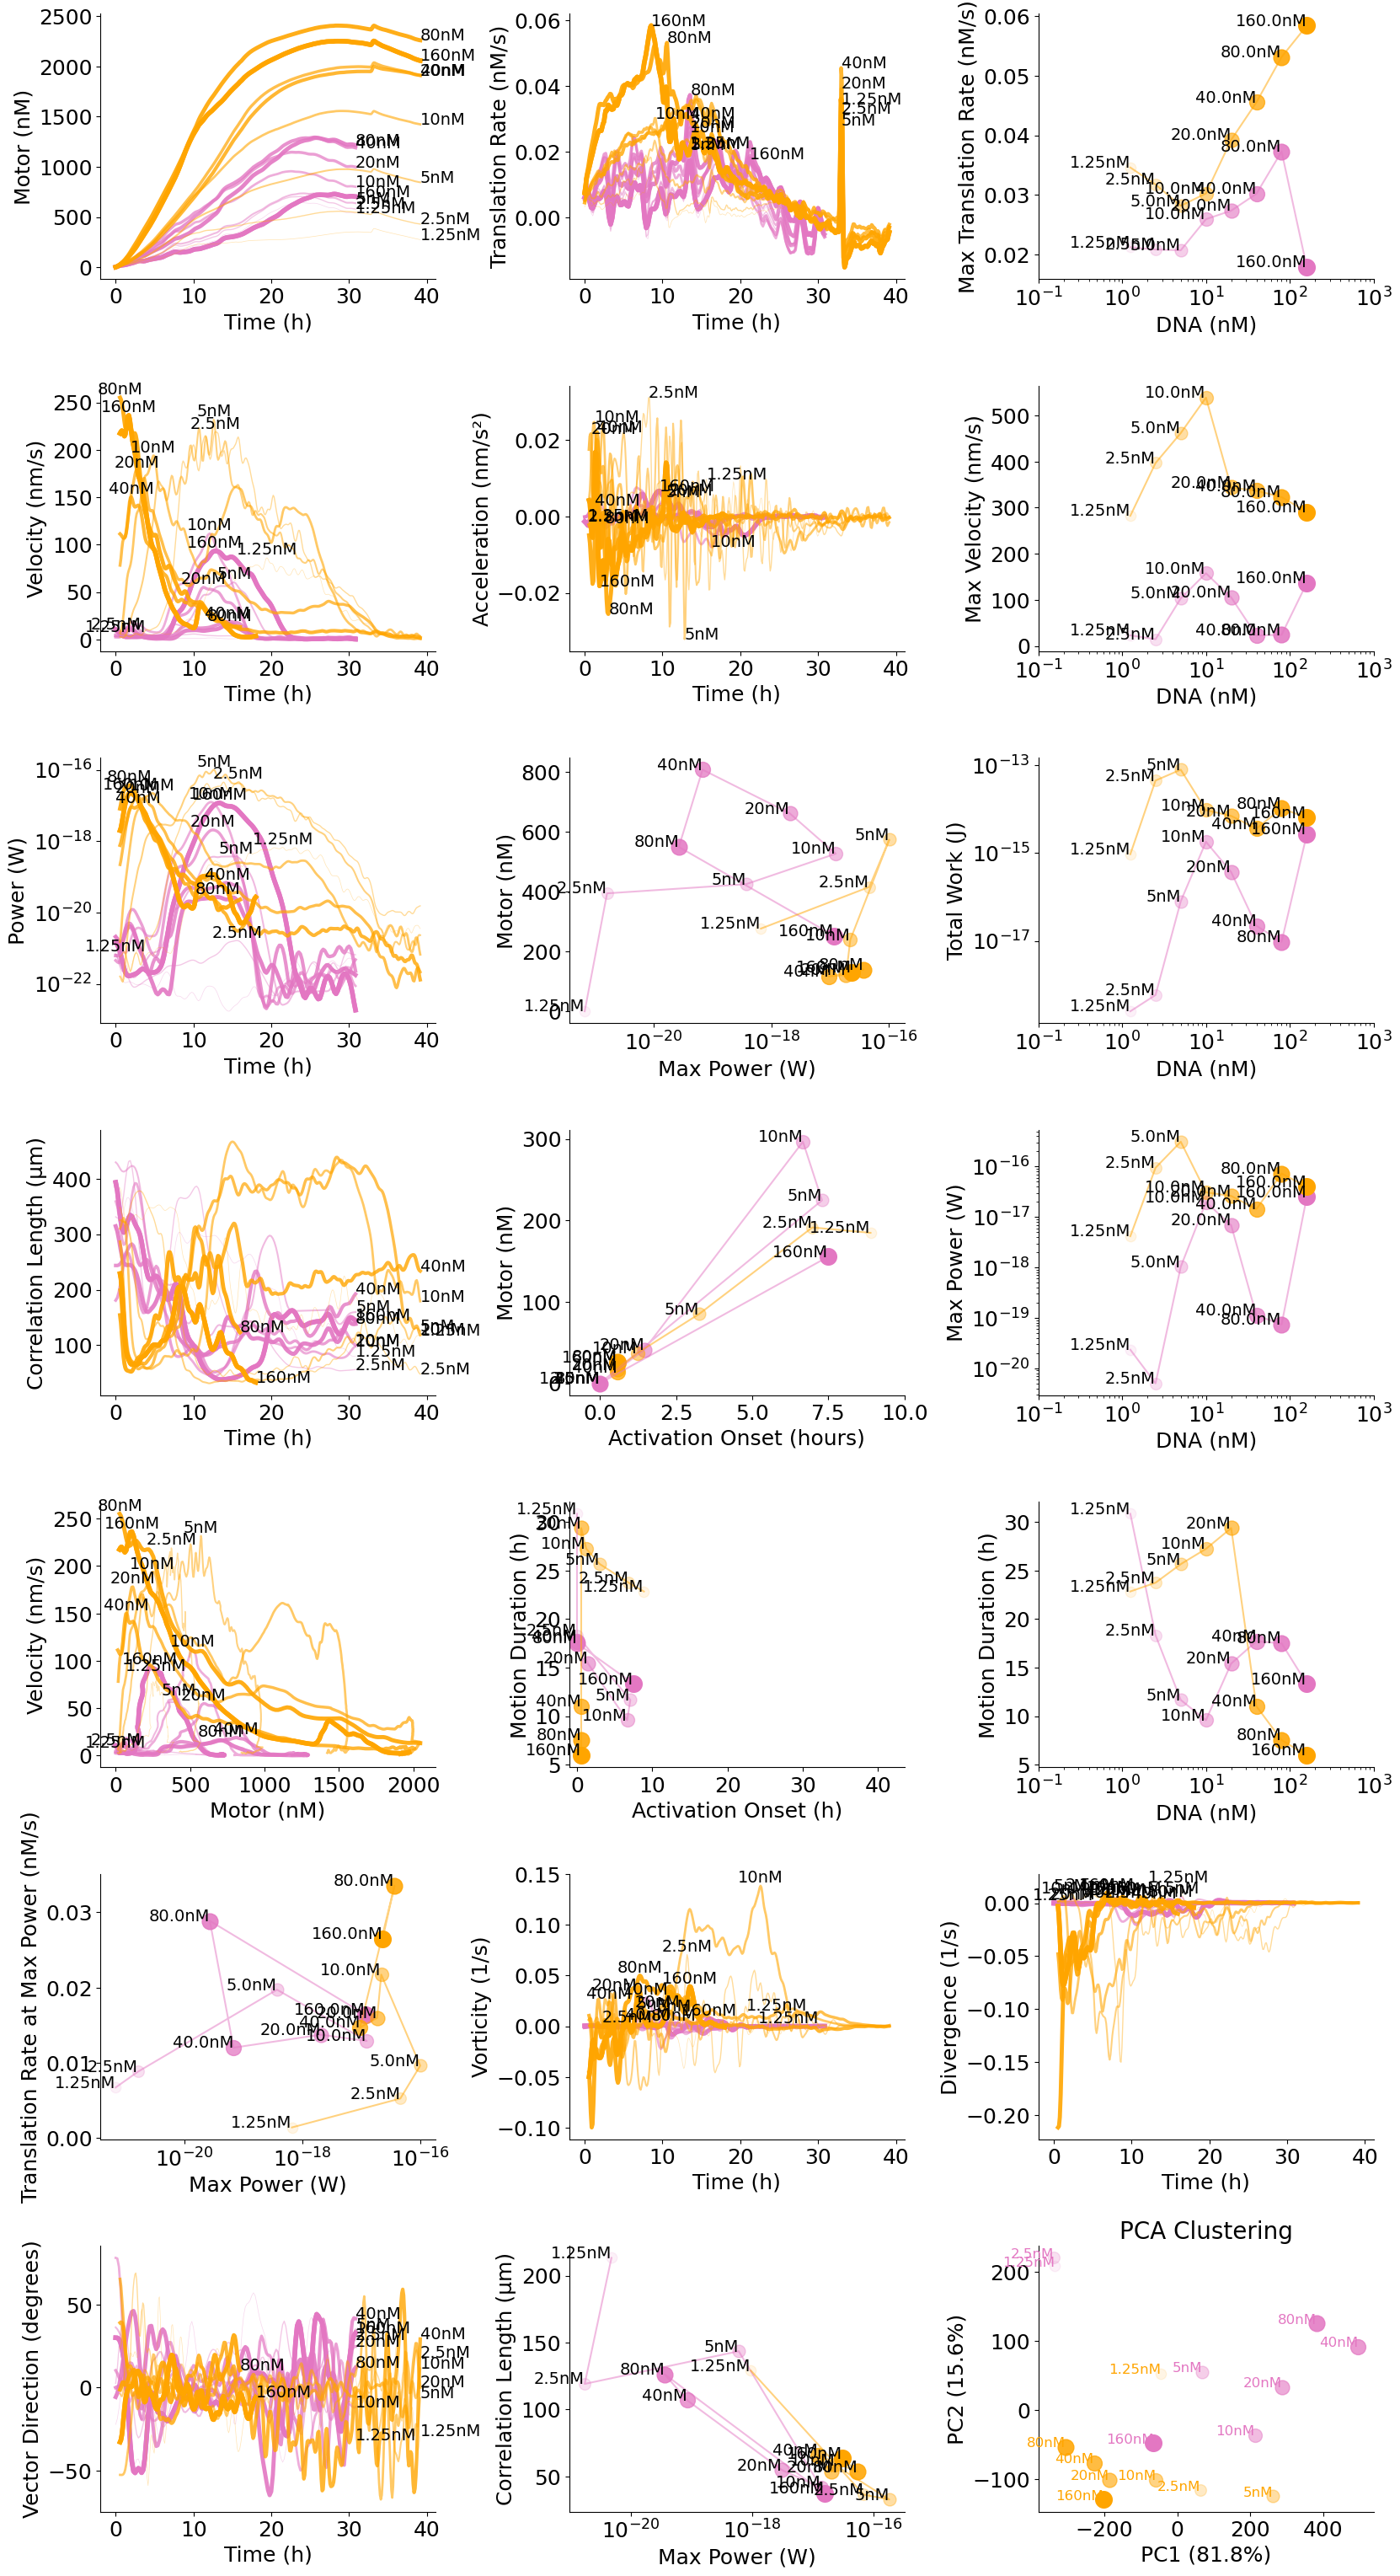

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FuncFormatter, LogLocator
from sklearn.decomposition import PCA

# ------------------------------
# Plotting functions (using a list of proteins)
# ------------------------------

def plot_protein_concentration_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    # Use full time range
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['Protein Concentration_nM', 'Time_h'])
            if df_filtered.empty:
                continue
            smoothed_conc = gaussian_filter1d(df_filtered['Protein Concentration_nM'], sigma=1)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Time_h'], smoothed_conc,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered['Time_h'].iloc[-1], smoothed_conc[-1],
                        f'{dna_conc}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Time_h'], smoothed_conc, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Motor (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_mean_power_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['power [W]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_power = gaussian_filter1d(df_filtered['power [W]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_power,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_power.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                p_peak = smoothed_power[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, p_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_power, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Power (W)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

def plot_correlation_length_vs_max_power(ax, df, proteins, dna_concentrations, time_col,
                                         color_map, velocity_threshold, time_unit, colored_DNAnM,
                                         display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, compute the maximum power (W) from a smoothed 'power [W]_mean'
    and plot Correlation Length (µm) vs Maximum Power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_powers = []
        corr_lengths = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['power [W]_mean', 'correlation length [m]_mean'])
            if df_sub.empty:
                continue
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx = smoothed_power.argmax()
            max_pwr = smoothed_power[idx]
            max_powers.append(max_pwr)
            corr_lengths.append(df_sub['correlation length [m]_mean'].iloc[idx] * 1e6)
            dna_labels.append(f'{dna}nM')
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, corr, alpha, size, label) in enumerate(zip(max_powers, corr_lengths, alphas, sizes, dna_labels)):
                ax.scatter(pwr, corr, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, corr, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, corr_lengths, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

def plot_mean_velocity_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)]\
                          .dropna(subset=['velocity magnitude [m/s]_mean', 'Protein Concentration_nM'])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                x_peak = df_filtered['Protein Concentration_nM'].iloc[idx]
                y_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(x_peak, y_peak, f'{dna_conc}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered['Protein Concentration_nM'], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel('Motor (nM)', fontsize=18)
    ax.set_ylabel('Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_total_work_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                          color_map, velocity_threshold, time_unit, colored_DNAnM,
                                          display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        if protein in df['protein'].unique():
            pdata = df[df['protein'] == protein]
            dnas = []
            works = []
            for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
                sub = pdata[pdata['DNA nM'] == str(dna)]
                work_series = sub['work [J]_mean'].dropna()
                if not work_series.empty:
                    dnas.append(float(dna))
                    works.append(work_series.iloc[-1])
            if not works:
                continue
            alphas = np.linspace(1.0, 0.1, len(dnas))
            sizes = np.linspace(200, 80, len(dnas))
            for i, (x, y, alpha, size) in enumerate(zip(dnas, works, alphas, sizes)):
                ax.scatter(x, y, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, y, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, works, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel('Total Work (J)', fontsize=18)
    ax.set_yscale('log')
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(loc='lower right', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_rate_of_change(ax, df, proteins, dna_concentrations, time_col,
                                                color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    # Use full time range (even if velocity data is missing)
    for protein in proteins:
        for i, dna_conc in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna_conc)) & (df['protein'] == protein)] \
                          .dropna(subset=['Protein Concentration_nM', 'time (s)'])
            if df_filtered.empty:
                continue
            conc = df_filtered['Protein Concentration_nM'].values
            time_vals = df_filtered['Time_h'].values 
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            # Compute derivative in nM per hour then convert to nM/s by dividing by 3600.
            dC_dt = np.gradient(smoothed_conc, time_vals) / 3600
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(time_vals, dC_dt,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                peak_idx = dC_dt.argmax()
                ax.text(time_vals[peak_idx], dC_dt[peak_idx], f'{dna_conc}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(time_vals, dC_dt,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw, label=protein)
    ax.set_xlabel('Time (h)', fontsize=18)
    ax.set_ylabel('Translation Rate (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_acceleration_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                             color_map, velocity_threshold, time_unit, colored_DNAnM,
                                             display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each protein and DNA concentration, this function:
      - Filters the data for that (protein, DNA) combination.
      - Smooths the velocity data (using 'velocity magnitude [m/s]_mean' converted to nm/s).
      - Computes the time derivative of the smoothed velocity (np.gradient), dividing by 3600 to convert from per hour to per second (nm/s²).
      - Plots the rate of change (acceleration) versus time.
    
    The x-axis remains in hours while the y-axis is in nm/s².
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
        
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                          .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_filtered.empty:
                continue
            # Convert velocity to nm/s and smooth it
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            # Compute the rate of change (acceleration) in nm/s².
            # np.gradient returns derivative in (nm/s)/h, so divide by 3600.
            dVel_dt = np.gradient(smoothed_vel, df_filtered[time_col].values) / 3600.0
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], dVel_dt,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text:
                # Label at the point of maximum absolute acceleration
                idx = np.argmax(np.abs(dVel_dt))
                t_peak = df_filtered[time_col].iloc[idx]
                rate_peak = dVel_dt[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, rate_peak, f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], dVel_dt,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw, label=protein)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Acceleration (nm/s²)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

def plot_max_velocity_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                             color_map, velocity_threshold, time_unit, colored_DNAnM,
                                             display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum velocity (nm/s)
    and plots it vs DNA concentration.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        velocities = []
        dnas = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]\
                  .dropna(subset=['velocity magnitude [m/s]_mean'])
            if sub.empty:
                continue
            max_vel = np.max(sub['velocity magnitude [m/s]_mean']) * 1e9
            velocities.append(max_vel)
            dnas.append(float(dna))
        if velocities:
            alphas = np.linspace(1.0, 0.1, len(velocities))
            sizes = np.linspace(200, 80, len(velocities))
            for i, (v, d, alpha, size) in enumerate(zip(velocities, dnas, alphas, sizes)):
                ax.scatter(d, v, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(d, v, f'{d}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, velocities, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel('Max Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_max_power_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                        color_map, velocity_threshold, time_unit, colored_DNAnM,
                                        display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum power (W)
    and plots it vs DNA concentration.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        powers = []
        dnas = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]\
                  .dropna(subset=['power [W]_mean'])
            if sub.empty:
                continue
            max_pwr = np.max(sub['power [W]_mean'])
            powers.append(max_pwr)
            dnas.append(float(dna))
        if powers:
            alphas = np.linspace(1.0, 0.1, len(powers))
            sizes = np.linspace(200, 80, len(powers))
            for i, (pwr, d, alpha, size) in enumerate(zip(powers, dnas, alphas, sizes)):
                ax.scatter(d, pwr, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(d, pwr, f'{d}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, powers, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel('Max Power (W)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_max_production_rate_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum protein production rate
    (i.e. maximum of the derivative d[Protein]/dt in nM/s) and plots it vs DNA concentration.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_rates = []
        dnas = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                      .dropna(subset=['Protein Concentration_nM', 'Time_h'])
            if df_sub.empty:
                continue
            conc = df_sub['Protein Concentration_nM'].values
            time_vals = df_sub['Time_h'].values
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            dC_dt = np.gradient(smoothed_conc, time_vals) / 3600.0
            max_rate = np.max(dC_dt)
            max_rates.append(max_rate)
            dnas.append(float(dna))
        if max_rates:
            alphas = np.linspace(1.0, 0.1, len(max_rates))
            sizes = np.linspace(200, 80, len(max_rates))
            for i, (rate, d, alpha, size) in enumerate(zip(max_rates, dnas, alphas, sizes)):
                ax.scatter(d, rate, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(d, rate, f'{d}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, max_rates, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel('Max Translation Rate (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_activation_onset_vs_protein_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                     color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                     display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        activation_onsets = []
        protein_concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]\
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=1)
            df_sub = df_sub.copy()
            df_sub['smoothed_velocity'] = smoothed_vel
            peak_vel = df_sub['smoothed_velocity'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smoothed_velocity'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                conc = above['Protein Concentration_nM'].iloc[0]
                activation_onsets.append(onset)
                protein_concs.append(conc)
                dna_labels.append(f'{dna}nM')
        if activation_onsets:
            alphas = np.linspace(1.0, 0.1, len(activation_onsets))
            sizes = np.linspace(200, 80, len(activation_onsets))
            for i, (onset, conc, alpha, size, label) in enumerate(zip(activation_onsets, protein_concs, alphas, sizes, dna_labels)):
                ax.scatter(onset, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(onset, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(activation_onsets, protein_concs, color=color_map.get(protein, 'black'),
                    alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (min)' if time_unit == 'min' else 'Activation Onset (hours)', fontsize=18)
    ax.set_ylabel('Motor (nM)', fontsize=18)
    ax.tick_params(labelsize=18)

    if time_unit == 'h':
        ax.set_xlim(left=-1)
        max_time = df[time_col].max()
        ax.set_xlim(right=max_time)
    else:
        ax.set_xlim(left=0)
        
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_rate_at_max_power(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes:
      - The maximum power (W) from a smoothed version of 'power [W]_mean'
      - The protein production rate (nM/s) at the time when that power is maximal.
      
    The x-axis is the maximum power and the y-axis is the production rate at max power.
    Marker sizes and alpha are set with a gradient.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True

    for protein in proteins:
        max_powers = []
        prod_rates = []
        dnas = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                      .dropna(subset=['Protein Concentration_nM', 'power [W]_mean', time_col])
            if df_sub.empty:
                continue
            time_vals = df_sub['Time_h'].values
            conc = df_sub['Protein Concentration_nM'].values
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            dC_dt = np.gradient(smoothed_conc, time_vals) / 3600.0  
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx_max = np.argmax(smoothed_power)
            max_pwr = smoothed_power[idx_max]
            prod_rate = dC_dt[idx_max]
            max_powers.append(max_pwr)
            prod_rates.append(prod_rate)
            dnas.append(float(dna))
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, rate, alpha, size) in enumerate(zip(max_powers, prod_rates, alphas, sizes)):
                ax.scatter(pwr, rate, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, rate, f'{dnas[i]}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, prod_rates, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Translation Rate at Max Power (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_vs_max_power(ax, df, proteins, dna_concentrations, time_col,
                                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum power (W)
    and plots Protein Concentration (nM) vs Max Power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_powers = []
        prot_concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['power [W]_mean', 'Protein Concentration_nM'])
            if df_sub.empty:
                continue
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx = smoothed_power.argmax()
            max_pwr = smoothed_power[idx]
            max_powers.append(max_pwr)
            prot_concs.append(df_sub['Protein Concentration_nM'].iloc[idx])
            dna_labels.append(f'{dna}nM')
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, conc, alpha, size, label) in enumerate(zip(max_powers, prot_concs, alphas, sizes, dna_labels)):
                ax.scatter(pwr, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, prot_concs, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Motor (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_max_power(ax, df, proteins, dna_concentrations, time_col,
                                         color_map, velocity_threshold, time_unit, colored_DNAnM,
                                         display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum power (W)
    and plots Correlation Length (µm) vs Max Power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_powers = []
        corr_lengths = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['power [W]_mean', 'correlation length [m]_mean'])
            if df_sub.empty:
                continue
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx = smoothed_power.argmax()
            max_pwr = smoothed_power[idx]
            max_powers.append(max_pwr)
            corr_lengths.append(df_sub['correlation length [m]_mean'].iloc[idx] * 1e6)
            dna_labels.append(f'{dna}nM')
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, corr, alpha, size, label) in enumerate(zip(max_powers, corr_lengths, alphas, sizes, dna_labels)):
                ax.scatter(pwr, corr, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, corr, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, corr_lengths, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

def plot_mean_velocity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                               display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                          .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_vel = gaussian_filter1d(df_filtered['velocity magnitude [m/s]_mean'] * 1e9, sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_vel,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                idx = smoothed_vel.argmax()
                t_peak = df_filtered[time_col].iloc[idx]
                v_peak = smoothed_vel[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_vel, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Velocity (nm/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                    color_map, velocity_threshold, time_unit, colored_DNAnM,
                                    display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_filtered = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                          .dropna(subset=['correlation length [m]_mean', time_col])
            if df_filtered.empty:
                continue
            smoothed_corr = gaussian_filter1d(df_filtered['correlation length [m]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_filtered[time_col], smoothed_corr * 1e6,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_filtered.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_filtered[time_col].iloc[-1], smoothed_corr[-1] * 1e6,
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_filtered[time_col], smoothed_corr * 1e6, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

def plot_motion_duration_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                               color_map, velocity_threshold, time_unit, colored_DNAnM,
                                               display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        xs = []
        durations = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                xs.append(float(dna))
                durations.append(dur)
        if durations:
            alphas = np.linspace(1.0, 0.1, len(durations))
            sizes = np.linspace(200, 80, len(durations))
            for i, (x, dur, alpha, size) in enumerate(zip(xs, durations, alphas, sizes)):
                ax.scatter(x, dur, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(x, dur, f'{x if x % 1 != 0 else int(x)}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(xs, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_motion_duration_vs_activation_onset(ax, df, proteins, dna_concentrations, time_col,
                                             color_map, velocity_threshold, time_unit, colored_DNAnM,
                                             display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        onsets = []
        durations = []
        labels = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))] \
                     .dropna(subset=['velocity magnitude [m/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vel = gaussian_filter1d(df_sub['velocity magnitude [m/s]_mean'], sigma=2)
            df_sub = df_sub.copy()
            df_sub['smooth_vel'] = smooth_vel
            peak_vel = df_sub['smooth_vel'].max()
            thresh = velocity_threshold * peak_vel
            above = df_sub[df_sub['smooth_vel'] >= thresh]
            if not above.empty:
                onset = above[time_col].iloc[0]
                dur = above[time_col].iloc[-1] - onset
                onsets.append(onset)
                durations.append(dur)
                labels.append(f'{dna}nM')
        if onsets:
            alphas = np.linspace(1.0, 0.1, len(onsets))
            sizes = np.linspace(200, 80, len(onsets))
            for i, (o, d, alpha, size, label) in enumerate(zip(onsets, durations, alphas, sizes, labels)):
                ax.scatter(o, d, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(o, d, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(onsets, durations, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Activation Onset (min)' if time_unit == 'min' else 'Activation Onset (h)', fontsize=18)
    ax.set_ylabel(f'Motion Duration ({time_unit})', fontsize=18)
    ax.tick_params(labelsize=18)
    if time_unit == 'h':
        ax.set_xlim(left=-1)
        max_time = df[time_col].max()
        ax.set_xlim(right=max_time)
    else:
        ax.set_xlim(left=0)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vorticity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vorticity [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vort = gaussian_filter1d(df_sub['vorticity [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_vort,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_vort.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_vort[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_vort, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vorticity (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_divergence_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['divergence [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_div = gaussian_filter1d(df_sub['divergence [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_div,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_div.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_div[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_div, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Divergence (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vector_direction_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)] \
                     .dropna(subset=['vector direction [degrees]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_dir = gaussian_filter1d(df_sub['vector direction [degrees]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_dir,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_sub[time_col].iloc[-1], smooth_dir[-1],
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_dir, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vector Direction (degrees)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()

# ------------------------------
# PCA Clustering 
# ------------------------------

def plot_PCA_clusters(ax, df, proteins, dna_concentrations, time_col,
                      color_map, velocity_threshold, time_unit, colored_DNAnM,
                      display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes:
      - Maximum velocity (nm/s)
      - Protein concentration at max velocity
      - Total work (last valid work [J]_mean)
      - Correlation length at max velocity (µm)
      - Activation onset (first time smoothed velocity exceeds threshold)
      - Motion duration (time difference between last and first time above threshold)
      - Vorticity at max velocity (vorticity [1/s]_mean)
      - Divergence at max velocity (divergence [1/s]_mean)
      - Max power (maximum power [W]_mean)
      
    Performs PCA on these 9 features and plots the first two principal components.
    Within each protein, a gradient of alphas and marker sizes is applied.
    """
    new_fig = False
    feature_list = []
    labels = []      # DNA concentration label
    prot_labels = [] # protein label

    for protein in proteins:
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            sub = df[(df['protein'] == protein) & (df['DNA nM'] == str(dna))]
            if sub.empty:
                continue
            sub = sub.dropna(subset=['velocity magnitude [m/s]_mean', 
                                      'Protein Concentration_nM', 
                                      'work [J]_mean', 
                                      'correlation length [m]_mean',
                                      'vorticity [1/s]_mean',
                                      'divergence [1/s]_mean',
                                      'power [W]_mean',
                                      time_col])
            if sub.empty:
                continue
            smooth_vel = gaussian_filter1d(sub['velocity magnitude [m/s]_mean'], sigma=2)
            idx_max = np.argmax(smooth_vel)
            max_vel = smooth_vel[idx_max] * 1e9  # nm/s
            prot_conc_at_max = sub['Protein Concentration_nM'].iloc[idx_max]
            total_work = sub['work [J]_mean'].dropna().iloc[-1]
            corr_length = sub['correlation length [m]_mean'].iloc[idx_max] * 1e6
            vorticity_at_max = sub['vorticity [1/s]_mean'].iloc[idx_max]
            divergence_at_max = sub['divergence [1/s]_mean'].iloc[idx_max]
            max_power = np.max(sub['power [W]_mean'].dropna())
            thresh = velocity_threshold * smooth_vel[idx_max]
            above = sub[smooth_vel >= thresh]
            if above.empty:
                continue
            activation_onset = above[time_col].iloc[0]
            motion_duration = above[time_col].iloc[-1] - activation_onset
            features = [max_vel, prot_conc_at_max, total_work, corr_length,
                        activation_onset, motion_duration, vorticity_at_max, divergence_at_max, max_power]
            feature_list.append(features)
            labels.append(f'{dna}nM')
            prot_labels.append(protein)
    if not feature_list:
        print("No data available for PCA.")
        return
    X = np.array(feature_list)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    explained = pca.explained_variance_ratio_
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
    unique_prots = sorted(list(set(prot_labels)))
    for prot in unique_prots:
        indices = [i for i, p in enumerate(prot_labels) if p == prot]
        group_len = len(indices)
        group_alphas = np.linspace(1.0, 0.1, group_len)
        group_sizes = np.linspace(200, 80, group_len)
        for j, idx in enumerate(indices):
            x, y = X_pca[idx]
            ax.scatter(x, y, color=color_map.get(prot, 'black'),
                       s=group_sizes[j], alpha=group_alphas[j])
            if display_dna_text:
                ax.text(x, y, labels[idx], fontsize=12, ha='right', color=color_map.get(prot, 'black'))
    ax.set_xlabel(f'PC1 ({explained[0]*100:.1f}%)', fontsize=18)
    ax.set_ylabel(f'PC2 ({explained[1]*100:.1f}%)', fontsize=18)
    ax.set_title('PCA Clustering', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if show_legends:
        for prot in unique_prots:
            ax.scatter([], [], color=color_map.get(prot, 'black'), label=prot)
        ax.legend(fontsize=16)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_max_production_rate_vs_dna_concentration(ax, df, proteins, dna_concentrations, time_col,
                                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum protein production rate (nM/s)
    and plots it vs DNA concentration.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_rates = []
        dnas = []
        for dna in sorted(dna_concentrations, key=lambda x: float(x), reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                      .dropna(subset=['Protein Concentration_nM', 'Time_h'])
            if df_sub.empty:
                continue
            conc = df_sub['Protein Concentration_nM'].values
            time_vals = df_sub['Time_h'].values
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            dC_dt = np.gradient(smoothed_conc, time_vals) / 3600.0
            max_rate = np.max(dC_dt)
            max_rates.append(max_rate)
            dnas.append(float(dna))
        if max_rates:
            alphas = np.linspace(1.0, 0.1, len(max_rates))
            sizes = np.linspace(200, 80, len(max_rates))
            for i, (rate, d, alpha, size) in enumerate(zip(max_rates, dnas, alphas, sizes)):
                ax.scatter(d, rate, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(d, rate, f'{d}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(dnas, max_rates, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('DNA (nM)', fontsize=18)
    ax.set_ylabel('Max Translation Rate (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    ax.set_xticks([10**i for i in range(-1, 4)])
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_rate_at_max_power(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes:
      - The maximum power (W) from a smoothed version of 'power [W]_mean'
      - The protein production rate (nM/s) at the time when that power is maximal.
      
    The x-axis is the maximum power and the y-axis is the production rate at max power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True

    for protein in proteins:
        max_powers = []
        prod_rates = []
        dnas = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                      .dropna(subset=['Protein Concentration_nM', 'power [W]_mean', time_col])
            if df_sub.empty:
                continue
            time_vals = df_sub['Time_h'].values
            conc = df_sub['Protein Concentration_nM'].values
            smoothed_conc = gaussian_filter1d(conc, sigma=1)
            dC_dt = np.gradient(smoothed_conc, time_vals) / 3600.0  
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx_max = np.argmax(smoothed_power)
            max_pwr = smoothed_power[idx_max]
            prod_rate = dC_dt[idx_max]
            max_powers.append(max_pwr)
            prod_rates.append(prod_rate)
            dnas.append(float(dna))
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, rate, alpha, size) in enumerate(zip(max_powers, prod_rates, alphas, sizes)):
                ax.scatter(pwr, rate, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, rate, f'{dnas[i]}nM', fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, prod_rates, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Translation Rate at Max Power (nM/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_protein_concentration_vs_max_power(ax, df, proteins, dna_concentrations, time_col,
                                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum power (W)
    and plots Protein Concentration (nM) vs Max Power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_powers = []
        prot_concs = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['power [W]_mean', 'Protein Concentration_nM'])
            if df_sub.empty:
                continue
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx = smoothed_power.argmax()
            max_pwr = smoothed_power[idx]
            max_powers.append(max_pwr)
            prot_concs.append(df_sub['Protein Concentration_nM'].iloc[idx])
            dna_labels.append(f'{dna}nM')
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, conc, alpha, size, label) in enumerate(zip(max_powers, prot_concs, alphas, sizes, dna_labels)):
                ax.scatter(pwr, conc, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, conc, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, prot_concs, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Motor (nM)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_correlation_length_vs_max_power(ax, df, proteins, dna_concentrations, time_col,
                                         color_map, velocity_threshold, time_unit, colored_DNAnM,
                                         display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    """
    For each (protein, DNA) combination, computes the maximum power (W)
    and plots Correlation Length (µm) vs Max Power.
    """
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        max_powers = []
        corr_lengths = []
        dna_labels = []
        for dna in sorted(dna_concentrations, reverse=True):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['power [W]_mean', 'correlation length [m]_mean'])
            if df_sub.empty:
                continue
            smoothed_power = gaussian_filter1d(df_sub['power [W]_mean'], sigma=2)
            idx = smoothed_power.argmax()
            max_pwr = smoothed_power[idx]
            max_powers.append(max_pwr)
            corr_lengths.append(df_sub['correlation length [m]_mean'].iloc[idx] * 1e6)
            dna_labels.append(f'{dna}nM')
        if max_powers:
            alphas = np.linspace(1.0, 0.1, len(max_powers))
            sizes = np.linspace(200, 80, len(max_powers))
            for i, (pwr, corr, alpha, size, label) in enumerate(zip(max_powers, corr_lengths, alphas, sizes, dna_labels)):
                ax.scatter(pwr, corr, color=color_map.get(protein, 'black'), s=size, alpha=alpha)
                if display_dna_text:
                    txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                    ax.text(pwr, corr, label, fontsize=14, ha='right', color=txt_color)
            ax.plot(max_powers, corr_lengths, color=color_map.get(protein, 'black'), alpha=0.5, label=protein)
    ax.set_xlabel('Max Power (W)', fontsize=18)
    ax.set_ylabel('Correlation Length (µm)', fontsize=18)
    ax.tick_params(labelsize=18)
    ax.set_xscale('log')
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vorticity_vs_time(ax, df, proteins, dna_concentrations, time_col,
                           color_map, velocity_threshold, time_unit, colored_DNAnM,
                           display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['vorticity [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_vort = gaussian_filter1d(df_sub['vorticity [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_vort,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_vort.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_vort[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_vort, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vorticity (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_divergence_vs_time(ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM,
                            display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['divergence [1/s]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_div = gaussian_filter1d(df_sub['divergence [1/s]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_div,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                idx = smooth_div.argmax()
                t_peak = df_sub[time_col].iloc[idx]
                v_peak = smooth_div[idx]
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(t_peak, v_peak, f'{dna}nM', fontsize=14, ha='center', va='bottom', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_div, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Divergence (1/s)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


def plot_vector_direction_vs_time(ax, df, proteins, dna_concentrations, time_col,
                                  color_map, velocity_threshold, time_unit, colored_DNAnM,
                                  display_dna_text, show_legends, output_dir, plot_filename, fig_size):
    new_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=fig_size)
        new_fig = True
    for protein in proteins:
        for i, dna in enumerate(sorted(dna_concentrations, reverse=True)):
            df_sub = df[(df['DNA nM'] == str(dna)) & (df['protein'] == protein)]\
                     .dropna(subset=['vector direction [degrees]_mean', time_col])
            if df_sub.empty:
                continue
            smooth_dir = gaussian_filter1d(df_sub['vector direction [degrees]_mean'], sigma=2)
            alpha = 1.0 - (i * 0.1)
            lw = 4.0 - (i * 0.5)
            ax.plot(df_sub[time_col], smooth_dir,
                    color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
            if display_dna_text and not df_sub.empty:
                txt_color = color_map.get(protein, 'black') if colored_DNAnM else 'black'
                ax.text(df_sub[time_col].iloc[-1], smooth_dir[-1],
                        f'{dna}nM', fontsize=14, ha='left', color=txt_color)
            if i == 0:
                ax.plot(df_sub[time_col], smooth_dir, label=protein,
                        color=color_map.get(protein, 'black'), alpha=alpha, linewidth=lw)
    ax.set_xlabel(f'Time ({time_unit})', fontsize=18)
    ax.set_ylabel('Vector Direction (degrees)', fontsize=18)
    ax.tick_params(labelsize=18)
    if show_legends:
        ax.legend(fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if new_fig:
        plt.tight_layout()
        fig.savefig(os.path.join(output_dir, plot_filename), dpi=500)
        plt.show()


# ------------------------------
# Master function with custom axis limits per plot
# ------------------------------

def generate_plots_master(df, proteins, dna_concentrations, output_dir,
                          velocity_threshold=0.2, time_unit='h', colored_DNAnM=True,
                          combined_plots=False, display_dna_text=True, show_legends=True,
                          plots_to_include=None, grid_size=(3,5), fig_size=(6,6)):
    """
    Generates selected plots from the DataFrame.
    
    Parameters:
      df: DataFrame with experimental data.
      proteins: list of proteins to plot.
      dna_concentrations: list of DNA concentrations (nM).
      output_dir: directory to save plots.
      velocity_threshold: threshold for velocity-dependent computations.
      time_unit: 'min' or 'h'.
      colored_DNAnM: flag to color DNA labels by protein.
      combined_plots: if True, all plots are combined in one grid.
      display_dna_text: if True, add DNA concentration labels on the plots.
      show_legends: if True, display legends; otherwise do not show legends.
      plots_to_include: a dictionary where keys are the plot keys and values are dictionaries of axis limits,
                        e.g.:
                        {
                            'Protein_Concentration_vs_Time': {'xlim': (0,50), 'ylim': (0,200)},
                            'Mean_Power_vs_Time': {'xlim': (0,50), 'ylim': (1e-2, 1e2)},
                            ...
                        }
                        The iteration order is preserved and determines the order in the grid.
      grid_size: tuple (rows, cols) for combined plots.
      fig_size: size (width, height) for each individual plot.
    """
    color_map = {
        'A': '#1f77b4', 'B': '#7f7f7f', 'C': '#2ca02c', 'D': '#d62728',
        'E': '#9467bd', 'F': '#8c564b', 'G': '#e377c2', 'H': '#ff7f0e',
        'ThTr': 'orange', 'AcSu2': '#8c564b', 'DiPu': '#9467bd', 'Blesto': '#8c564b'
    }
    time_col = 'Time_min' if time_unit == 'min' else 'Time_h'
    proteins_str = '_'.join(proteins)
    dna_str = '_'.join(map(str, dna_concentrations))
    dna_output_dir = os.path.join(output_dir, f'{proteins_str}_Full_Range')
    os.makedirs(dna_output_dir, exist_ok=True)
    
    plot_functions = {
        'Protein_Concentration_vs_Time': plot_protein_concentration_vs_time,
        'Protein_Concentration_Rate_of_Change': plot_protein_concentration_rate_of_change,
        'Max_Production_Rate_vs_DNA_Concentration': plot_max_production_rate_vs_dna_concentration,

        'Mean_Velocity_vs_Time': plot_mean_velocity_vs_time,
        'Acceleration_vs_Time': plot_acceleration_vs_time,
        'Max_Velocity_vs_DNA_Concentration': plot_max_velocity_vs_dna_concentration,

        'Mean_Power_vs_Time': plot_mean_power_vs_time,
        'Protein_Concentration_vs_Max_Power': plot_protein_concentration_vs_max_power, 
        'Total_Work_vs_DNA_Concentration': plot_total_work_vs_dna_concentration,

        'Correlation_Length_vs_Time': plot_correlation_length_vs_time,
        'Activation_Onset_vs_Protein_Concentration': plot_activation_onset_vs_protein_concentration,
        'Max_Power_vs_DNA_Concentration': plot_max_power_vs_dna_concentration,

        'Mean_Velocity_vs_Protein_Concentration': plot_mean_velocity_vs_protein_concentration,
        'Motion_Duration_vs_Activation_Onset': plot_motion_duration_vs_activation_onset,
        'Motion_Duration_vs_DNA_Concentration': plot_motion_duration_vs_dna_concentration,

     
############
        'Rate_at_Max_Power': plot_rate_at_max_power,
        'Vorticity_vs_Time': plot_vorticity_vs_time,
        'Divergence_vs_Time': plot_divergence_vs_time,
        'Vector_Direction_vs_Time': plot_vector_direction_vs_time,
        'Correlation_Length_vs_Max_Power': plot_correlation_length_vs_max_power,  # modified to use power

        'PCA_Clusters': plot_PCA_clusters,
        }
    
    # If no custom ranges are provided, create an empty dictionary for all keys.
    if plots_to_include is None:
        plots_to_include = { key: {} for key in plot_functions.keys() }
    
    if combined_plots:
        num_plots = len(plots_to_include)
        rows, cols = grid_size
        fig, axes = plt.subplots(rows, cols, figsize=(cols * fig_size[0], rows * fig_size[1]),
                                 gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
        axes = axes.flatten()
        current_ax_index = 0
    
    for key in plots_to_include:
        if key not in plot_functions or plot_functions[key] is None:
            continue
        if combined_plots:
            ax = axes[current_ax_index]
            current_ax_index += 1
        else:
            ax = None
        plot_filename = f'{key}_{proteins_str}_{dna_str}.svg'
        plot_functions[key](ax, df, proteins, dna_concentrations, time_col,
                            color_map, velocity_threshold, time_unit, colored_DNAnM, display_dna_text,
                            show_legends, dna_output_dir, plot_filename, fig_size)
        limits = plots_to_include[key]
        if 'xlim' in limits:
            ax.set_xlim(limits['xlim'])
        if 'ylim' in limits:
            ax.set_ylim(limits['ylim'])
    if combined_plots:
        combined_filename = os.path.join(dna_output_dir, f'Combined_Plots_{proteins_str}_{dna_str}.svg')
        fig.savefig(combined_filename, dpi=500)
        plt.show()


# ------------------------------
# Example usage
# ------------------------------

# Generate titrations
titrations = [160 / (2 ** i) for i in range(11)]
titrations = [int(t) if t.is_integer() else t for t in titrations][:8]
print("Titrations:", titrations)



plots_to_include = {
    'Protein_Concentration_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Protein_Concentration_Rate_of_Change': {'xlim': (None, None), 'ylim': (None, None)},
    'Max_Production_Rate_vs_DNA_Concentration': {'xlim': (None, None), 'ylim': (None, None)},

    'Mean_Velocity_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Acceleration_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Max_Velocity_vs_DNA_Concentration': {'xlim': (None, None), 'ylim': (None, None)},

    'Mean_Power_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Protein_Concentration_vs_Max_Power':{'xlim': (None, None), 'ylim': (None, None)},
    'Total_Work_vs_DNA_Concentration': {'xlim': (None, None), 'ylim': (None, None)},

    'Correlation_Length_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Activation_Onset_vs_Protein_Concentration': {'xlim': (None, 10), 'ylim': (None, None)},
    'Max_Power_vs_DNA_Concentration': {'xlim': (None, None), 'ylim': (None, None)},

    'Mean_Velocity_vs_Protein_Concentration': {'xlim': (None, None), 'ylim': (None, None)},
    'Motion_Duration_vs_Activation_Onset': {'xlim': (None, None), 'ylim': (None, None)},
    'Motion_Duration_vs_DNA_Concentration': {'xlim': (None, None), 'ylim': (None, None)},
    
############
    'Rate_at_Max_Power': {'xlim': (None, None), 'ylim': (None, None)},
    'Vorticity_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Divergence_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Vector_Direction_vs_Time': {'xlim': (None, None), 'ylim': (None, None)},
    'Correlation_Length_vs_Max_Power': {'xlim': (None, None), 'ylim': (None, None)},  
    'PCA_Clusters': {'xlim': (None, None), 'ylim': (None, None)},  
}

proteins = [
    # 'A', 
    # 'B',
    # 'C', 
    # 'D',
    # 'E',
    # 'F',
    'G',
    # 'H', 
    'ThTr', 
    # 'HeAl',
    # 'AcSu2',
    # 'DiPu',
    # 'Blesto',
]    
# Assume filter_and_replace_values is defined elsewhere and loads & preprocesses your DataFrame.
df_copy = filter_and_replace_values(df, filters)

generate_plots_master(df_copy, proteins, dna_concentrations=titrations,
                        output_dir='../../../Downloads/Selected_Proteins_Plots',
                        velocity_threshold=0.2, time_unit='h', colored_DNAnM=False,
                        combined_plots=True, display_dna_text=True, show_legends=False,
                        plots_to_include=plots_to_include, grid_size=(7,3), fig_size=(6.5,5.5))